In [2]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import ruptures as rpt
from scipy.signal import find_peaks

In [3]:
def convertDF(path): 
    '''converting a dataframe to a new datafrom with float, 5 decimal places and '''

    # reading in file, and skipping top row
    df = pd.read_csv(path, skiprows=1)

    # defining the titles of the rows
    body_loc = df.columns.tolist()

    # creating new empty dataframe
    df_new = pd.DataFrame()


    for part in body_loc:
        if part == 'bodyparts' or '.2' in part:
            continue
        else:
            df_new[part] = pd.to_numeric(df[part].iloc[1:], errors='coerce').dropna().round(5).astype(float)


    return df_new

In [4]:
convertDF(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv')

,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


In [5]:
# defining my path to pt one
IO_03_09_2023_RSTN = Path(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder')

# list of all the videos for this specific patient (c1s is missing for this patient)
dbs_loc = ['b1f', 'b1s', 'b2f', 'b2s', 'b3f', 'b3s', 'c1f', 'c1s', 'c2s', 'c3f', 'c3s', 't1f', 't1s', 't2f', 't2s', 't3f', 't3s']

# place to store all the df
dataframes = {}

files = list(IO_03_09_2023_RSTN.iterdir())

# iterating over each file for pt 1 and converting the df to floats and cleaning up the data
for file, label in zip(IO_03_09_2023_RSTN.iterdir(), dbs_loc):
    dataframes[label] = convertDF(file)
    print(f"{label} loaded from {file.name}")


b1f loaded from 20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b1s loaded from 20230309_b1_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2f loaded from 20230309_b2_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2s loaded from 20230309_b2_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3f loaded from 20230309_b3_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3s loaded from 20230309_b3_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1f loaded from 20230309_c1_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1s loaded from 20230309_c2_d2p0_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c2s loaded from 20230309_c2_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c3f lo

Detected change points: [1745, 2515, 3210, 4010, 4258]


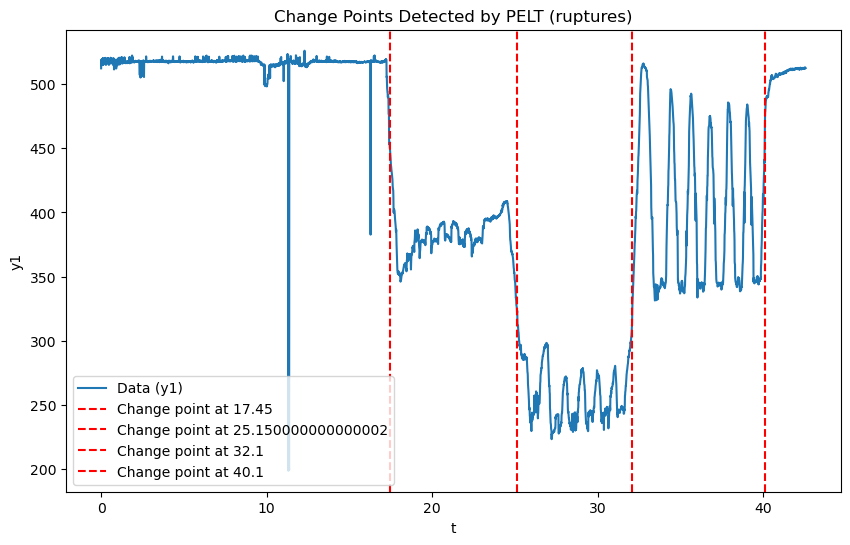

In [6]:
# pulling data from the dataframe
b1f = dataframes['b1f']
x = b1f['MCP1.1']

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
x_np = x.to_numpy() if hasattr(x, 'to_numpy') else x

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(x_np)
result = algo.predict(pen=1000000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

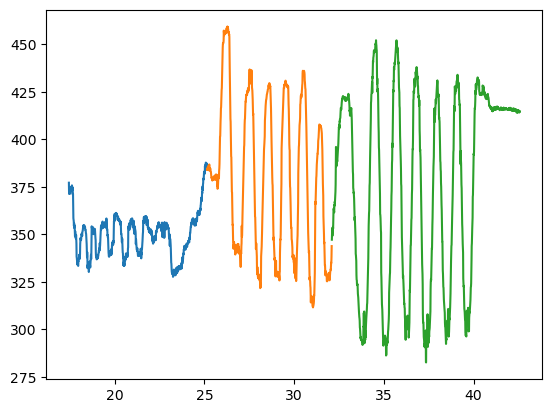

In [7]:
ftx = b1f['fTip1']

hand_OC = ftx[result[0]:result[1]]
hand_PS = ftx[result[1]:result[2]]
arm_EF = ftx[result[2]:]

t_hand_OC = t[result[0]:result[1]]
t_hand_PS = t[result[1]:result[2]]
t_arm_EF = t[result[2]:]

plt.plot(t_hand_OC, hand_OC)
plt.show
plt.plot(t_hand_PS, hand_PS)
plt.show
plt.plot(t_arm_EF, arm_EF)

770
770


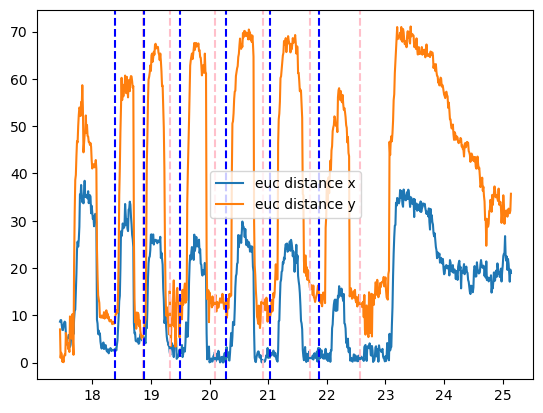

In [8]:
b1f = dataframes['b1f']
fTip1x = b1f['fTip1']
fTip1y = b1f['fTip1.1']
fTip2x = b1f['fTip2']
fTip2y = b1f['fTip2.1']



# Element-wise subtraction: col1 - col2
euc_dis_x = np.abs(fTip1x-fTip2x)
euc_dis_y = np.abs(fTip1y-fTip2y)

ed_x = euc_dis_x[result[0]:result[1]]
ed_y = euc_dis_y[result[0]:result[1]]

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

print(len(ed_x))
print(len(t_hand_OC))


plt.plot(t_hand_OC, ed_x, label = 'euc distance x')
plt.plot(t_hand_OC, ed_y, label = 'euc distance y')
plt.legend()

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

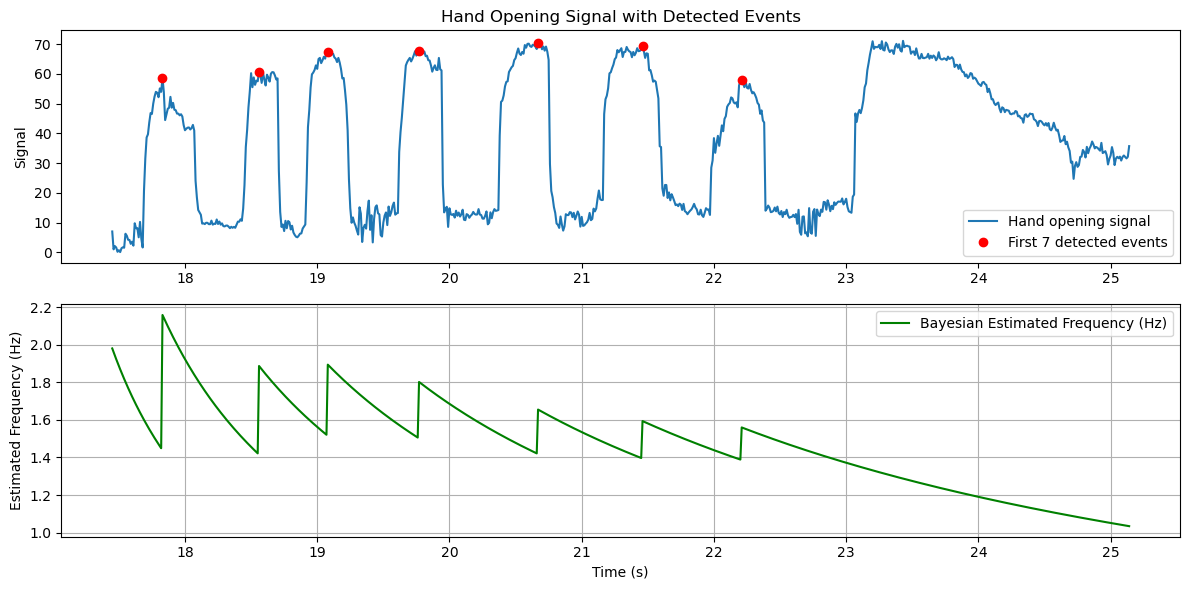

In [9]:
# hand_OC data 
fs = 100  # sampling rate in Hz
t = t_hand_OC
signal = ed_y

# Detect peaks as 'hand open' events
peaks, _ = find_peaks(signal, height=0.3, distance=fs // 2)  # assumes ~1-2 Hz hand movement

# Keep only the first 6 events
peaks = peaks[:7]

# Create binary event signal
event_counts = np.zeros_like(signal)
event_counts[peaks] = 1

# Initialize Gamma prior
alpha_0 = 2.0
beta_0 = 1.0

alpha = alpha_0
beta = beta_0

lambda_estimates = []  # posterior means over time

# Bayesian updating: frame-by-frame
for i in range(len(t)):
    y_i = event_counts[i]  # 0 or 1
    alpha += y_i
    beta += 1 / fs  # add small time step
    lambda_estimates.append(alpha / beta)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Hand opening signal')
plt.plot(t[peaks], signal.iloc[peaks], 'ro', label='First 7 detected events')
plt.ylabel('Signal')
plt.legend()
plt.title('Hand Opening Signal with Detected Events')

plt.subplot(2, 1, 2)
plt.plot(t, lambda_estimates, color='green', label='Bayesian Estimated Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Estimated Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


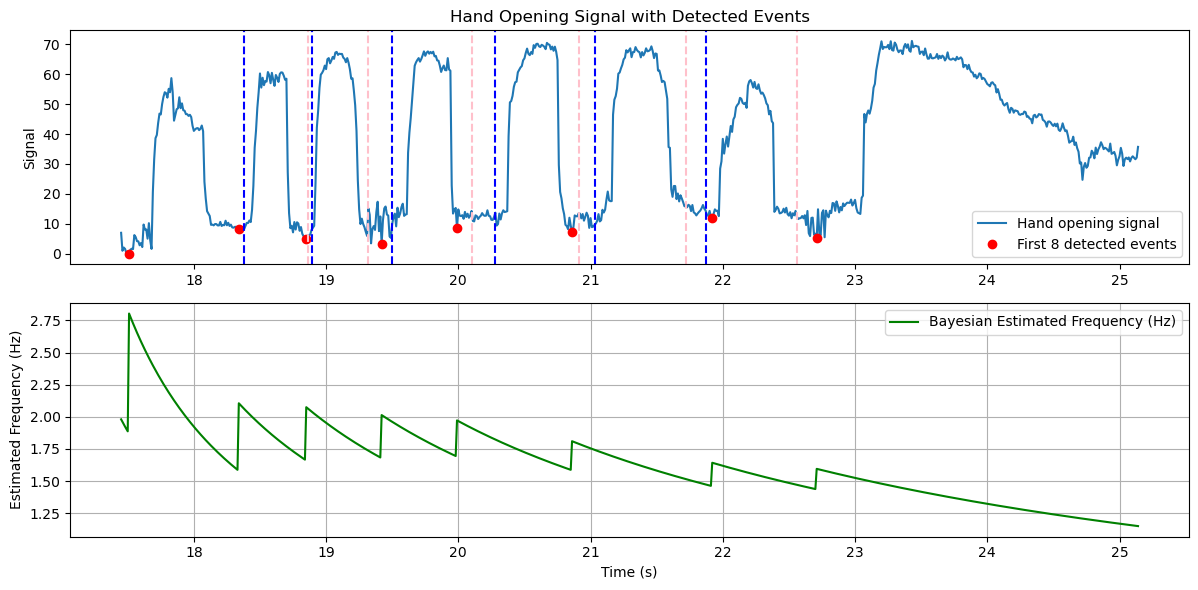

In [10]:
# hand_OC data 
fs = 100  # sampling rate in Hz
t = t_hand_OC
signal = ed_y

# Detect troughs as 'hand open' events
troughs, _ = find_peaks(-signal, height=None, prominence=0.1, width=5, distance=fs // 2)  # assumes ~1 Hz hand movement

# Keep only the first 8 events
troughs = troughs[:8]

# Create binary event signal
event_counts = np.zeros_like(signal)
event_counts[troughs] = 1

# Initialize Gamma prior
alpha_0 = 2.0
beta_0 = 1.0

alpha = alpha_0
beta = beta_0

lambda_estimates = []  # posterior means over time

# Bayesian updating: frame-by-frame
for i in range(len(t)):
    y_i = event_counts[i]  # 0 or 1
    alpha += y_i
    beta += 1 / fs  # add small time step
    lambda_estimates.append(alpha / beta)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Hand opening signal')
plt.plot(t[troughs], signal.iloc[troughs], 'ro', label='First 8 detected events')
plt.ylabel('Signal')
plt.legend()
plt.title('Hand Opening Signal with Detected Events')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.subplot(2, 1, 2)
plt.plot(t, lambda_estimates, color='green', label='Bayesian Estimated Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Estimated Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


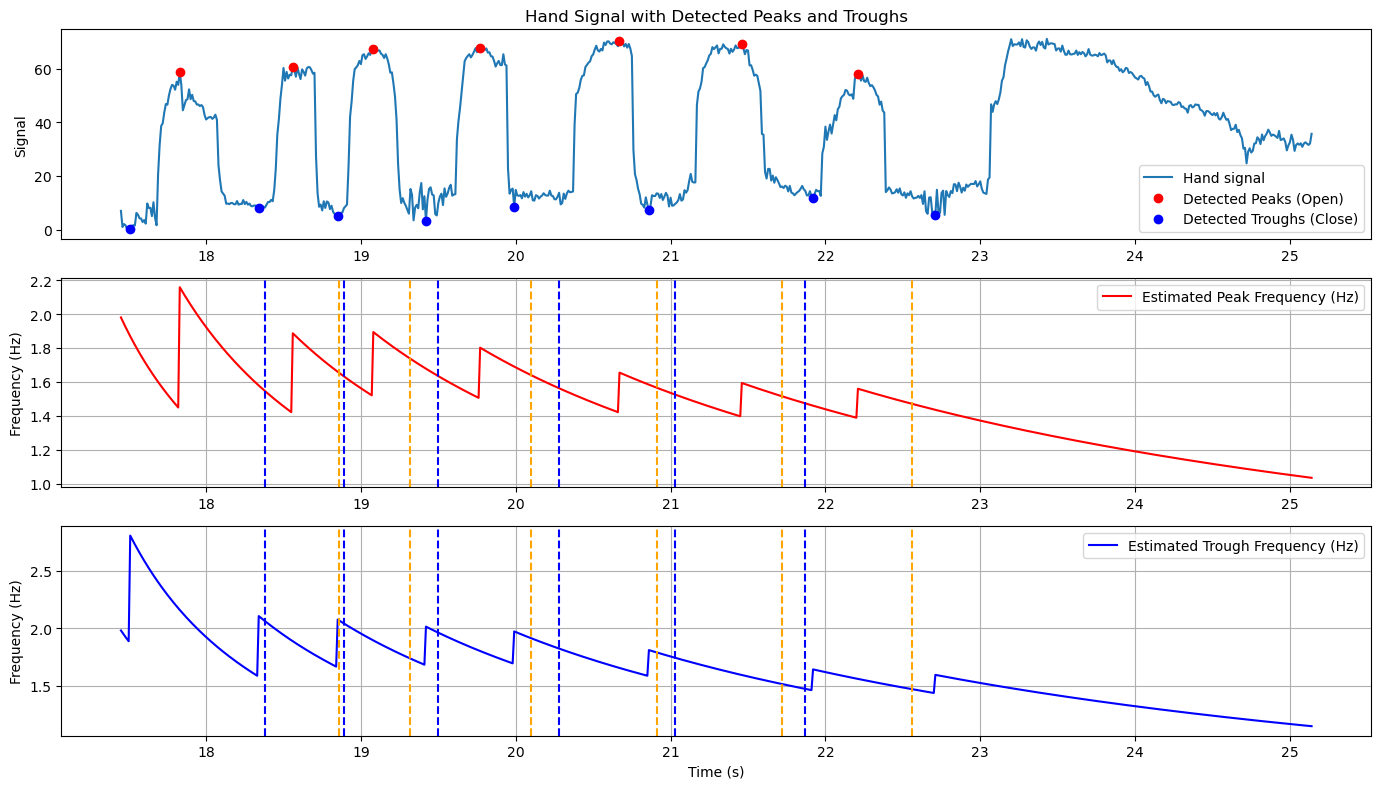

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming these are defined:
# fs = 100  # sampling rate in Hz
# t = t_hand_OC  # time vector, numpy array
# signal = ed_y  # signal, pandas Series

# 1. Detect peaks (hand opens)
peaks, _ = find_peaks(signal, height=0.3, distance=fs // 2)

# 2. Detect troughs (hand closes) by inverting the signal
troughs, _ = find_peaks(-signal, height=None, prominence=0.1, width=5, distance=fs // 2)  # assumes ~1-2 Hz hand movement (by changing the //2, this changes how often the event occurs and then cahgnes how often it believes you will have a peak)

# limit to first N events if you want
N = 7
peaks = peaks[:N]
troughs = troughs[:N+1]

# 3. Create event count arrays
event_counts_peaks = np.zeros_like(signal)
event_counts_troughs = np.zeros_like(signal)

event_counts_peaks[peaks] = 1
event_counts_troughs[troughs] = 1

# 4. Initialize Gamma priors for peaks and troughs
alpha_peak, beta_peak = 2.0, 1.0
alpha_trough, beta_trough = 2.0, 1.0

lambda_peak_estimates = []
lambda_trough_estimates = []

# 5. Bayesian updating loop over time
for i in range(len(t)):
    y_peak = event_counts_peaks[i]
    y_trough = event_counts_troughs[i]

    alpha_peak += y_peak
    beta_peak += 1 / fs

    alpha_trough += y_trough
    beta_trough += 1 / fs

    lambda_peak_estimates.append(alpha_peak / beta_peak)
    lambda_trough_estimates.append(alpha_trough / beta_trough)

# Convert lists to numpy arrays for plotting
lambda_peak_estimates = np.array(lambda_peak_estimates)
lambda_trough_estimates = np.array(lambda_trough_estimates)

# 6. Plot results
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Hand signal')
plt.plot(t[peaks], signal.iloc[peaks], 'ro', label='Detected Peaks (Open)')
plt.plot(t[troughs], signal.iloc[troughs], 'bo', label='Detected Troughs (Close)')
plt.ylabel('Signal')
plt.title('Hand Signal with Detected Peaks and Troughs')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, lambda_peak_estimates, color='red', label='Estimated Peak Frequency (Hz)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'orange')

plt.subplot(3, 1, 3)
plt.plot(t, lambda_trough_estimates, color='blue', label='Estimated Trough Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'orange')

plt.tight_layout()
plt.show()


[ 39 163 233 316 393 478 594]


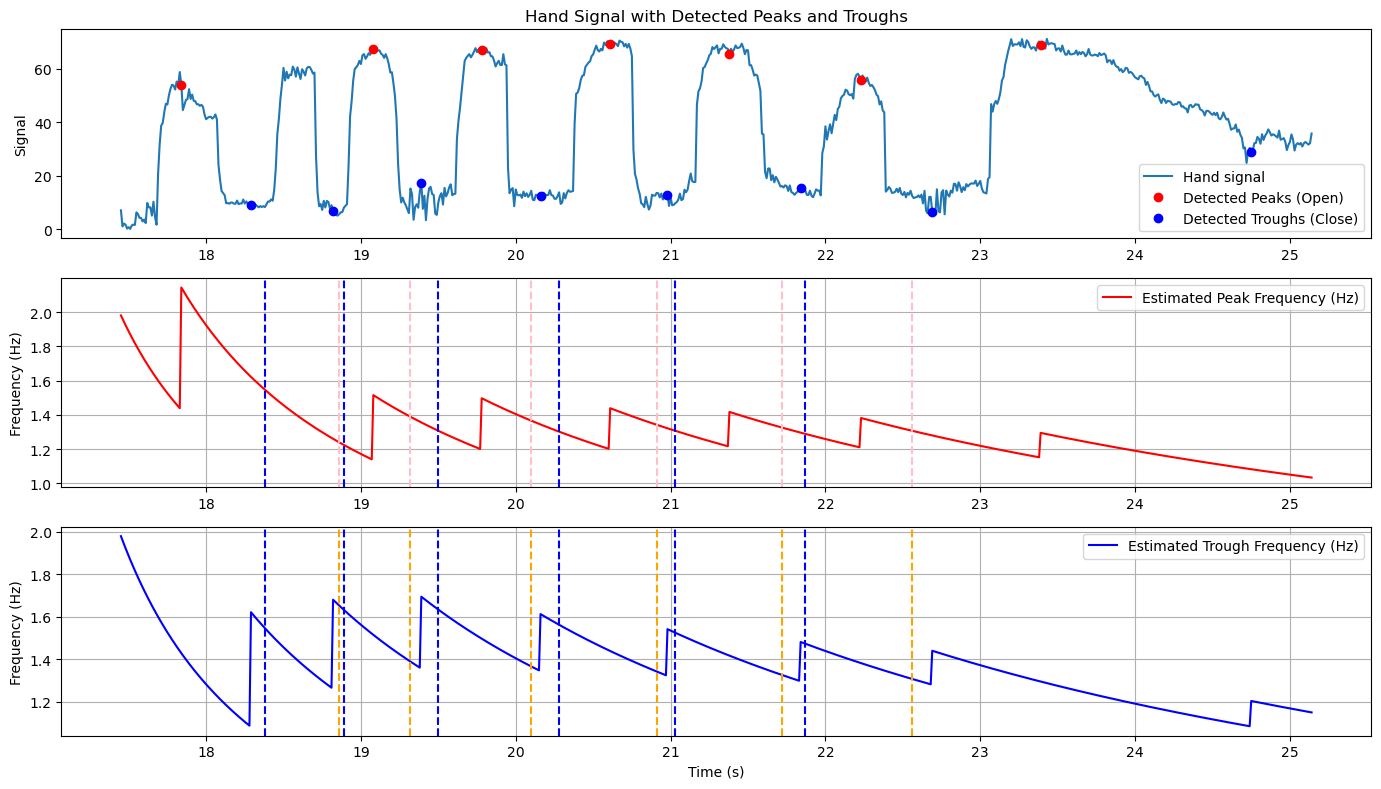

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d



smooth_signal = gaussian_filter1d(signal, sigma=6)

# 1. Detect peaks (hand opens)
peaks, _ = find_peaks(smooth_signal, height=0.3, prominence=0.1, width=5, distance=fs // 2)

# 2. Detect troughs (hand closes) by inverting the signal
troughs, _ = find_peaks(-smooth_signal, height=None, prominence=0.1, width=5, distance=fs // 2)  # assumes ~1-2 Hz hand movement (by changing the //2, this changes how often the event occurs and then cahgnes how often it believes you will have a peak)

# limit to first N events if you want
N = 7
peaks = peaks[:N]
troughs = troughs[:N+1]

print(peaks)

# 3. Create event count arrays
event_counts_peaks = np.zeros_like(smooth_signal)
event_counts_troughs = np.zeros_like(smooth_signal)

event_counts_peaks[peaks] = 1
event_counts_troughs[troughs] = 1

# 4. Initialize Gamma priors for peaks and troughs
alpha_peak, beta_peak = 2.0, 1.0
alpha_trough, beta_trough = 2.0, 1.0

lambda_peak_estimates = []
lambda_trough_estimates = []

# 5. Bayesian updating loop over time
for i in range(len(t)):
    y_peak = event_counts_peaks[i]
    y_trough = event_counts_troughs[i]

    alpha_peak += y_peak
    beta_peak += 1 / fs

    alpha_trough += y_trough
    beta_trough += 1 / fs

    lambda_peak_estimates.append(alpha_peak / beta_peak)
    lambda_trough_estimates.append(alpha_trough / beta_trough)

# Convert lists to numpy arrays for plotting
lambda_peak_estimates = np.array(lambda_peak_estimates)
lambda_trough_estimates = np.array(lambda_trough_estimates)

# 6. Plot results
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Hand signal')
plt.plot(t[peaks], signal.iloc[peaks], 'ro', label='Detected Peaks (Open)')
plt.plot(t[troughs], signal.iloc[troughs], 'bo', label='Detected Troughs (Close)')
plt.ylabel('Signal')
plt.title('Hand Signal with Detected Peaks and Troughs')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, lambda_peak_estimates, color='red', label='Estimated Peak Frequency (Hz)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.subplot(3, 1, 3)
plt.plot(t, lambda_trough_estimates, color='blue', label='Estimated Trough Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'orange')

plt.tight_layout()
plt.show()
